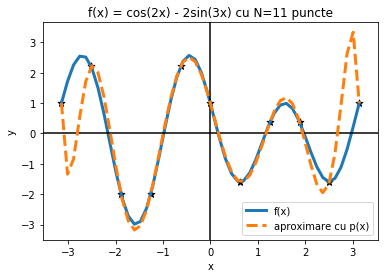

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# datele problemei: f, a, b
def f(x):
    return np.cos(2*x) - 2 * np.sin(3*x)

def polinom(a, x):
    # calculez polinomul cu coeficientii 'a' in punctul x
    s = 0
    for i in range(len(a)):
        s += a[i] * (x ** i)
    return s

a = -math.pi
b = math.pi

# plotare f pe [a, b]
x_grafic = np.linspace(a, b, 50) # discretizare a intervalului [a, b]
y_grafic = f(x_grafic)

plt.figure(0)
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f(x)') # desenez graficul functiei f

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

# noduri de interpolare
N = 10
plt.title('f(x) = cos(2x) - 2sin(3x) cu N=' + str(N+1) + ' puncte') # Titlul figurii
X = np.linspace(a, b, N+1) # discretizare a intervalului [a, b] cu N+1 puncte
Y = f(X)

# plotare noduri interpolare
plt.scatter(X, Y, s=50, c='black', marker='*') # s=size, marker-forma punctelor

A = np.vander(X, N+1, increasing = True) # matricea coef
B = np.hstack(Y)

if (abs(np.linalg.det(A)) < 10e-14):
    print('sistemul nu are o solutie unica')
else:
    a = np.linalg.solve(A, B) # determinare coeficienti polinom de interpolare
    p = polinom(a, x_grafic) # polinomul cu aceeasi discretizare ca la f 
    plt.plot(x_grafic, p, linestyle = '--', linewidth = 3, label = 'aproximare cu p(x)') # desenez graficul polinomului
plt.legend() # Adauga legenda
    
plt.show() # Arata graficul

In [1]:
# 2. Metoda Lagrange
plt.figure(0)
plt.plot(x_grafic, y_grafic, linestyle = '-', linewidth = 3, label = 'f(x)') # desenez graficul functiei f

plt.axvline(0, c='black') # Adauga axa OY
plt.axhline(0, c='black') # Adauga axa OX

plt.xlabel('x') # Label pentru axa OX
plt.ylabel('y') # Label pentru axa OY

# noduri de interpolare
N = 10
plt.title('f(x) = cos(2x) - 2sin(3x) cu N=' + str(N+1) + ' puncte') # Titlul figurii

# plotare noduri interpolare
plt.scatter(X, Y, s=50, c='black', marker='*') # s=size, marker-forma punctelor

##################### https://stackoverflow.com/questions/4003794/lagrange-interpolation-in-python
def coefLagrange(x_grafic, X, k):
    # calculez l0 .. ln #M: De fapt, calculezi lk(x_grafic) aici, nu toata baza.
    #L = []
    L = 1 #M: Fiind vorba de un scalar, evitam lista
    for j in range(N+1):
        if k != j:
            #L.append((x_grafic - X[j]) / (X[k] - X[j]))
            L *= (x_grafic - X[j]) / (X[k] - X[j])
    return L #M: Functiile numpy e bine sa fie apelate pe np.array-uri sau scalari, cel mai simplu, evita listele

#def polLagrange(L, X): #M: L va fi calculat la fiecare pas in functie de i, asa ca il scoatem ca parametru de intrare si
# inlocium cu punctul x_grafic in care vrem sa calculam polionmul
def polLagrange(x_grafic, X, Y):
    # calculez polinomul cu metoda lagrange in punctul x (M: i.e. x_grafic in notatia ta)
    suma = 0
    for i in range(N+1):
        suma += coefLagrange(x_grafic, X, i) * Y[i]
    return suma

#polinom2 = [0] * (N+1) #M: La fel cum la interpolarea directa, l-ai definit pe p pe aceeasi discretizare cu f, x_grafic, asa facem si acum
polinom2 = [0] * len(x_grafic)
for i in range(len(x_grafic)):
    #L = coefLagrange(x_grafic, X, k) #M: Coeficientii sunt calculati in interiorul functiei poLagrange
    polinom2[i] = polLagrange(x_grafic[i], X, Y)

    
plt.plot(x_grafic, polinom2, linestyle = '--', linewidth = 3, label = 'aproximare cu p(x) met lagrange') # desenez graficul polinomului

plt.legend() # Adauga legenda
plt.show() # Arata graficul

NameError: name 'plt' is not defined

In [ ]:
"""x_grafic
f(x_grafic) - Polinom(x_grafic)
in modul
intr-o noua figura
pentru eroare
+ noduri cebasev"""

In [ ]:
# f(x) = 1/ (1 + 25 x**2), a = -1, b = 1